In [1]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec
import numpy as np
import datetime as dt
import csv
%matplotlib inline

# preprocess data

## 1 generate categorical occupancy data

In [2]:
totalLength = 29101
print(totalLength)

29101


In [3]:
# starting from 11:56 Monday

In [4]:
# assuming the between two classes, no occupancy change

In [5]:
nPerHour = 60/5
nPerDay = nPerHour*24
nPerWeek = nPerDay*7

# for 11:50
shiftPoints = nPerHour*23+50/5

In [6]:
# every day start from 0:00 to 23:55
def computeWeekOccupancy(nPerHour,nPerDay,nPerWeek):
    Mon = []
    MonStart = 9.5*nPerHour
    MonEnd = 18*nPerHour
    for i in range(nPerDay):
        if MonStart <= i <= MonEnd:
            Mon += [1]
        else:
            Mon += [0]

    Tue = []
    TueStart = 10.3*nPerHour
    TueEnd = 15*nPerHour
    for i in range(nPerDay):
        if TueStart<=i <=TueEnd:
            Tue +=[1]
        else:
            Tue += [0]

    Wed = Mon
    Thur = Tue

    Fri = []
    FriStart1 = 9.5*nPerHour
    FriEnd1 = 10.5*nPerHour
    FriStart2 = 12.5*nPerHour
    FriEnd2 = 13.5*nPerHour
    for i in range(nPerDay):
        if (FriStart1<=i<=FriEnd1) or (FriStart2<=i<=FriEnd2):
            Fri += [1]
        else:
            Fri += [0]

    Sat = [0]*nPerDay
    Sun = [0]*nPerDay

    weekPeriod = Mon+Tue+Wed+Thur+Fri+Sat+Sun
    return weekPeriod
weekPeriod = computeWeekOccupancy(nPerHour,nPerDay,nPerWeek)

In [7]:
weeksNumber = totalLength/len(weekPeriod)
restDays = totalLength-weeksNumber*len(weekPeriod)+shiftPoints
print(restDays)
print(shiftPoints)
print(len(weekPeriod))

1163
286
2016


In [8]:
occupancyData = []

for i in range(weeksNumber):
    occupancyData += weekPeriod
occupancyData += weekPeriod[:restDays]
occupancyData = occupancyData[142:]
print(len(occupancyData))


29245


In [9]:

def writeCSV(occupancyData):
        c = csv.writer(open("occupancyData.csv", "w"))
        for row in occupancyData:
            print(row)
            c.writerow(str(row))
writeCSV(occupancyData) # without considering Holiday

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## 2 eliminate outliers for five variables

import data set

In [10]:
# load data
dateConverter = lambda d : dt.datetime.strptime(d,'%Y/%m/%d %H:%M')
names = ("timeStamp","airFlowRate","dampPos","dischargeTemp","zoneCO2","zoneTemp","occupancy") 
data = np.genfromtxt('data_binary.csv',delimiter=",",names=names,dtype=[dt.datetime,'f','<f8','f8','f8','f8','b'],converters={'timeStamp': dateConverter},skip_header = 1)
print(data)

[ (datetime.datetime(2015, 8, 30, 23, 56), 560.162109375, 11.23907089, 57.52135468, 333.749115, 68.36264801, 0)
 (datetime.datetime(2015, 8, 31, 0, 1), 560.1679077148438, 11.23907089, 57.40848923, 334.8786316, 68.34007263, 0)
 (datetime.datetime(2015, 8, 31, 0, 6), 560.2184448242188, 11.23907089, 57.29562378, 336.0081482, 68.31749725, 0)
 ...,
 (datetime.datetime(2015, 12, 9, 23, 46), 540.2632446289062, 14.26988697, 58.20000076, 324.3655396, 69.1088562, 0)
 (datetime.datetime(2015, 12, 9, 23, 51), 540.2632446289062, 14.26988697, 58.20000076, 324.0, 69.09999847, 0)
 (datetime.datetime(2015, 12, 9, 23, 56), 540.2632446289062, 14.26988697, 58.20000076, 324.0, 69.09999847, 0)]


extract variables

In [11]:
timeStamp = data['timeStamp']
airFlow = data['airFlowRate']
dampPos = data['dampPos']
dischargeTemp = data['dischargeTemp']
zoneCO2 = data['zoneCO2']
zoneTemp = data['zoneTemp']

# dependent variable
occupancy = data['occupancy']

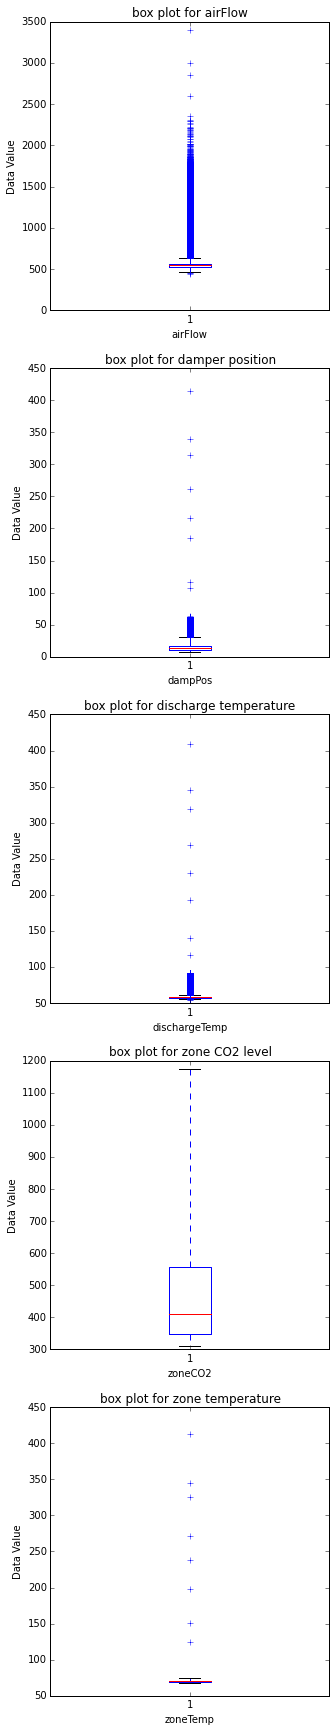

In [12]:
#print(airFlow)

fig = plt.figure(1, figsize=(5, 30))
plt.subplot(5,1,1)
airFlow_boxplot = plt.boxplot(airFlow,whis =3)
plt.xlabel('airFlow')
plt.ylabel('Data Value')
plt.title('box plot for airFlow')

#top_points = r["fliers"][0].get_data()[0]
#bottom_points = r["fliers"][2].get_data()[0]
#print(top_points)

plt.subplot(5,1,2)
dampPos_boxplot = plt.boxplot(dampPos,whis =3)
plt.xlabel('dampPos')
plt.ylabel('Data Value')
plt.title('box plot for damper position')

plt.subplot(5,1,3)
dischargeTemp_boxplot = plt.boxplot(dischargeTemp,whis =3)
plt.xlabel('dischargeTemp')
plt.ylabel('Data Value')
plt.title('box plot for discharge temperature')

plt.subplot(5,1,4)
zoneCO2_boxplot = plt.boxplot(zoneCO2,whis =3)
plt.xlabel('zoneCO2')
plt.ylabel('Data Value')
plt.title('box plot for zone CO2 level')

plt.subplot(5,1,5)
zoneTemp_boxplot = plt.boxplot(zoneTemp,whis =3)
plt.xlabel('zoneTemp')
plt.ylabel('Data Value')
plt.title('box plot for zone temperature')

In [13]:
help(plt.boxplot)
# mark the mean    
#means = [np.mean(x) for x in data]
#plt.scatter([1, 2, 3], means)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=False, sym=None, vert=True, whis=1.5, positions=None, widths=None, patch_artist=False, bootstrap=None, usermedians=None, conf_intervals=None, meanline=False, showmeans=False, showcaps=True, showbox=True, showfliers=True, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, hold=None)
    Make a box and whisker plot.
    
    Call signature::
    
      boxplot(self, x, notch=False, sym='b+', vert=True, whis=1.5,
              positions=None, widths=None, patch_artist=False,
              bootstrap=None, usermedians=None, conf_intervals=None,
              meanline=False, showmeans=False, showcaps=True,
              showbox=True, showfliers=True, boxprops=None, labels=None,
              flierprops=None, medianprops=None, meanprops=None,
              capprops=None, whiskerprops=None, manage_xticks=True):
    
    Make a box and whisker


definition of extreme outliers:

IQR = Q3 −  Q1

lower outer fence: Q1 - 3*IQR

upper outer fence: Q3 + 3*IQR

http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm;

http://www.purplemath.com/modules/boxwhisk3.htm

In [14]:
airFlow_upper_quartile = np.percentile(airFlow, 75)
airFlow_lower_quartile = np.percentile(airFlow, 25)

airFlow_IQR = airFlow_upper_quartile - airFlow_lower_quartile
airFlow_upper_outlier = airFlow[airFlow>airFlow_upper_quartile+3*airFlow_IQR]
airFlow_lower_outlier = airFlow[airFlow<airFlow_lower_quartile-3*airFlow_IQR]
print(len(list(airFlow_upper_outlier)+list(airFlow_lower_outlier)))

5534


boxPlot documentation http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot

In [15]:
print(len([item.get_ydata() for item in airFlow_boxplot['fliers']][0]))

5534


extract outliers

In [16]:
airFlowOutlier = [item.get_ydata() for item in airFlow_boxplot['fliers']][0]
print(airFlowOutlier)
print(type(airFlowOutlier))
dampPosOutlier = [item.get_ydata() for item in dampPos_boxplot['fliers']][0]
dischargeTempOutlier = [item.get_ydata() for item in dischargeTemp_boxplot['fliers']][0]
zoneCO2Outlier = [item.get_ydata() for item in zoneCO2_boxplot['fliers']][0]
zoneTempOutlier = [item.get_ydata() for item in zoneTemp_boxplot['fliers']][0]

[  450.21081543   444.28781128   448.73660278 ...,  1388.79541016
  1089.65246582   785.36322021]
<type 'numpy.ndarray'>


find the outliers corresponding index

airFlow

In [17]:
airFlowOutlier_index = []
airFlow = list(airFlow)
for outlier in airFlowOutlier:
    airFlowOutlier_index += [airFlow.index(outlier)]
airFlowOutlier_index = set(airFlowOutlier_index)

dampPos

In [18]:
dampPosOutlier_index = []
dampPos = list(dampPos)
for outlier in dampPosOutlier:
    dampPosOutlier_index += [dampPos.index(outlier)]
dampPosOutlier_index = set(dampPosOutlier_index)

dischargeTemp

In [19]:
dischargeTempOutlier_index = []
dischargeTemp = list(dischargeTemp)
for outlier in dischargeTempOutlier:
    dischargeTempOutlier_index += [dischargeTemp.index(outlier)]
dischargeTempOutlier_index = set(dischargeTempOutlier_index)

zoneCO2

In [20]:
zoneCO2Outlier_index = []
zoneCO2 = list(zoneCO2)
for outlier in zoneCO2Outlier:
    zoneCO2Outlier_index += [zoneCO2.index(outlier)]
zoneCO2Outlier_index = set(zoneCO2Outlier_index)

zoneTemp

In [21]:
zoneTempOutlier_index = []
zoneTemp = list(zoneTemp)
for outlier in zoneTempOutlier:
    zoneTempOutlier_index += [zoneTemp.index(outlier)]
zoneTempOutlier_index = set(zoneTempOutlier_index)

In [22]:
outlier_index = sorted(list(airFlowOutlier_index|dampPosOutlier_index|dischargeTempOutlier_index|zoneCO2Outlier_index|zoneTempOutlier_index))
print("eliminate %d number of values from the whole dataSet which originally has %d number of values" % (len(outlier_index),len(airFlow)))


eliminate 6969 number of values from the whole dataSet which originally has 29089 number of values


In [23]:
print(outlier_index)

[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 45

In [24]:
occupancy = list(occupancy)
new_timeStamp = []
new_airFlow = []
new_dampPos = []
new_dischargeTemp = []
new_zoneCO2 = []
new_zoneTemp = []
new_occupancy = []
print(len(airFlow),len(dampPos),len(dischargeTemp),len(zoneCO2),len(zoneTemp))
for i in range(len(airFlow)):
    if i not in outlier_index:
        new_timeStamp += [timeStamp[i]]
        new_airFlow += [airFlow[i]]
        new_dampPos += [dampPos[i]]
        new_dischargeTemp += [dischargeTemp[i]]
        new_zoneCO2 += [zoneCO2[i]]
        new_zoneTemp += [zoneTemp[i]]
        new_occupancy += [occupancy[i]]
print(len(new_airFlow),len(new_dampPos),len(new_dischargeTemp),len(new_zoneCO2),len(new_zoneTemp))

(29089, 29089, 29089, 29089, 29089)
(22120, 22120, 22120, 22120, 22120)


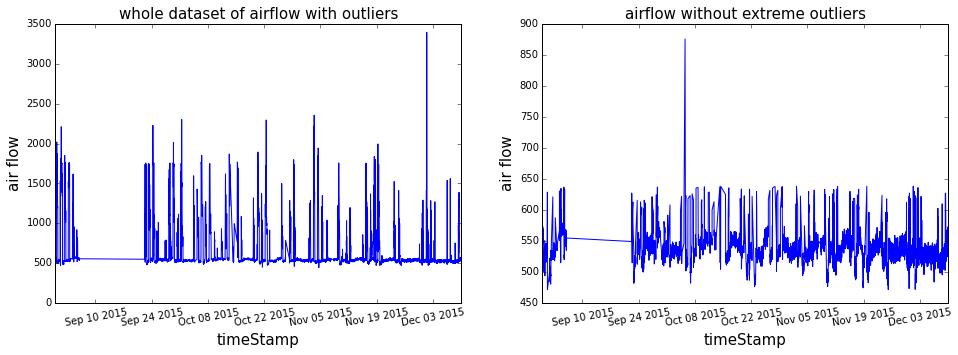

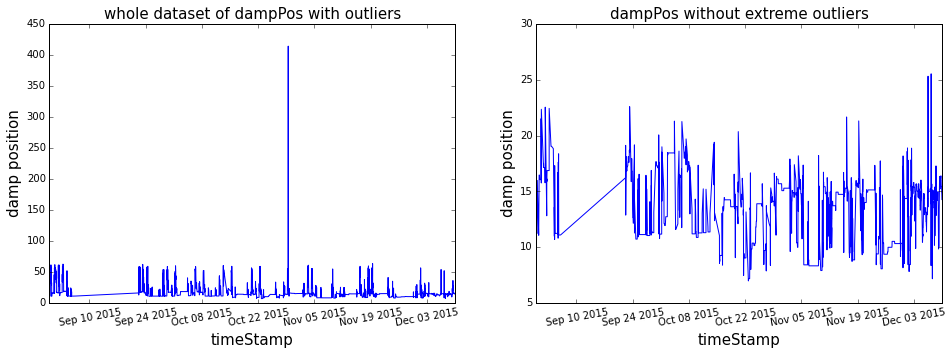

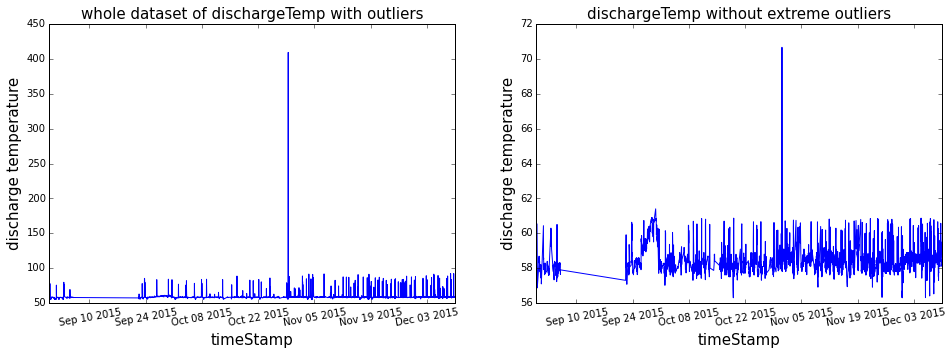

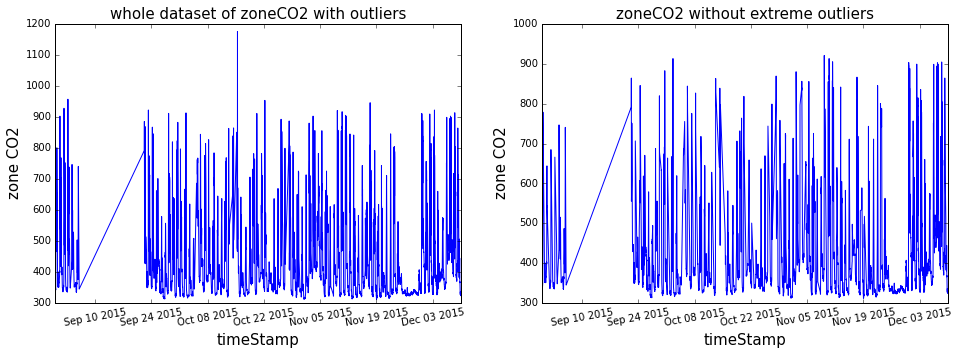

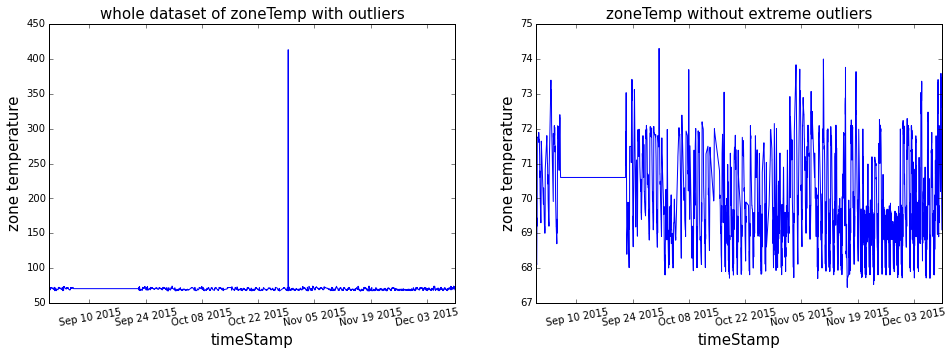

In [25]:
# airFlow
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(timeStamp,airFlow)
plt.title('whole dataset of airflow with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=10)
plt.ylabel('air flow',size = 15)

plt.subplot(1, 2, 2)
plt.plot(new_timeStamp,new_airFlow)
plt.title('airflow without extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=10)
plt.ylabel('air flow',size = 15)

# dampPos
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(timeStamp,dampPos)
plt.title('whole dataset of dampPos with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=10)
plt.ylabel('damp position',size = 15)

plt.subplot(1, 2, 2)
plt.plot(new_timeStamp,new_dampPos)
plt.title('dampPos without extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=10)
plt.ylabel('damp position',size = 15)

# dischargeTemp
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(timeStamp,dischargeTemp)
plt.title('whole dataset of dischargeTemp with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=10)
plt.ylabel('discharge temperature',size = 15)

plt.subplot(1, 2, 2)
plt.plot(new_timeStamp,new_dischargeTemp)
plt.title('dischargeTemp without extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=10)
plt.ylabel('discharge temperature',size = 15)

# zoneCO2
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(timeStamp,zoneCO2)
plt.title('whole dataset of zoneCO2 with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=10)
plt.ylabel('zone CO2',size = 15)

plt.subplot(1, 2, 2)
plt.plot(new_timeStamp,new_zoneCO2)
plt.title('zoneCO2 without extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=10)
plt.ylabel('zone CO2',size = 15)

# zoneTemp
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(timeStamp,zoneTemp)
plt.title('whole dataset of zoneTemp with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=10)
plt.ylabel('zone temperature',size = 15)

plt.subplot(1, 2, 2)
plt.plot(new_timeStamp,new_zoneTemp)
plt.title('zoneTemp without extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=10)
plt.ylabel('zone temperature',size = 15)

# 3 eliminate unreasonable data

From the plot of 'zoneTemp without extreme outliers', the sensor is malfunctional during about Sep 8 to Sep 21 and zone temprature is constant.

In [26]:
print(new_timeStamp[3001])
print(new_timeStamp[3002])
print(new_zoneTemp[3001])
print(new_zoneTemp[3002])

2015-09-12 17:31:00
2015-09-12 17:36:00
70.59999847
70.59999847


In [27]:
malfunction_index = []
for i in range(len(new_timeStamp)):
    if new_zoneTemp[i]==new_zoneTemp[3001]:
        malfunction_index += [i]
print(malfunction_index)

[1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 124

In [28]:
print(timeStamp[malfunction_index[1080]])
print(timeStamp[6790])
print(timeStamp[11745])
print(timeStamp[21569])

2015-09-07 11:56:00
2015-09-23 13:46:00
2015-10-10 18:41:00
2015-11-13 21:21:00


From the specific data of malfunction_index, sensor is malfunctional in two periods. They are eliminated below.

In [29]:
final_timeStamp = []
final_airFlow = []
final_dampPos = []
final_dischargeTemp = []
final_zoneCO2 = []
final_zoneTemp = []
final_occupancy = []
for i in range(len(new_timeStamp)):
    if i not in malfunction_index:
        final_timeStamp += [new_timeStamp[i]]
        final_airFlow += [new_airFlow[i]]
        final_dampPos += [new_dampPos[i]]
        final_dischargeTemp += [new_dischargeTemp[i]]
        final_zoneCO2 += [new_zoneCO2[i]]
        final_zoneTemp += [new_zoneTemp[i]]
        final_occupancy += [new_occupancy[i]]

print(len(new_timeStamp))
print(len(final_timeStamp))

22120
17384


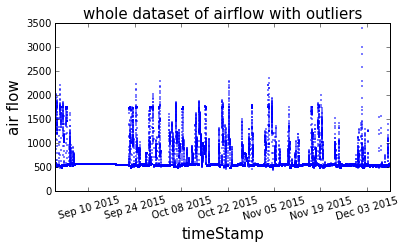

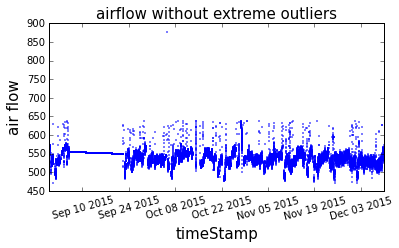

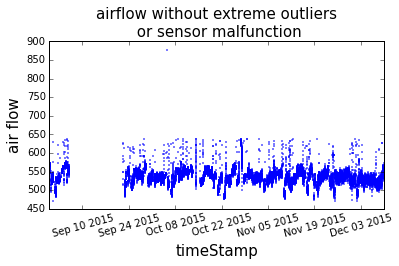

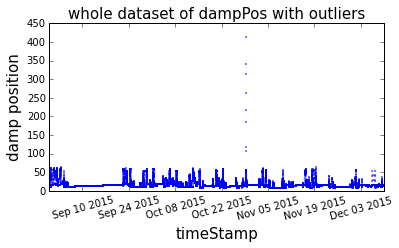

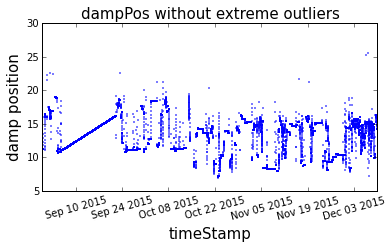

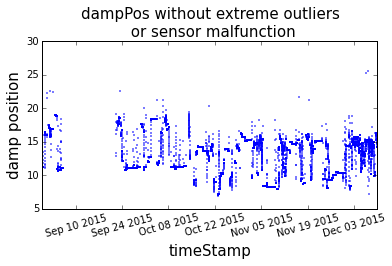

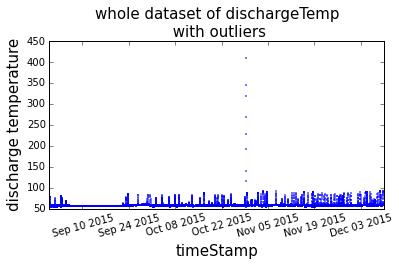

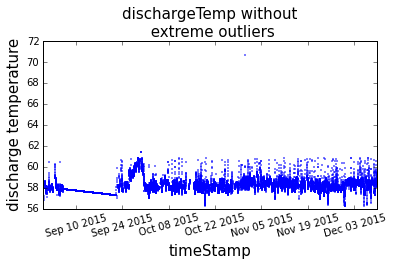

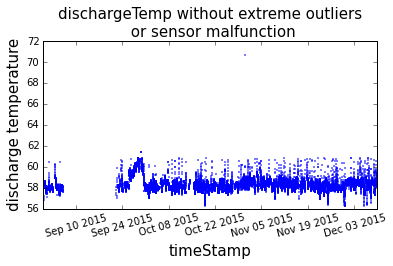

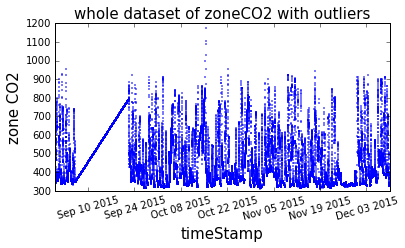

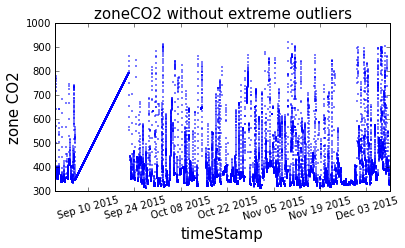

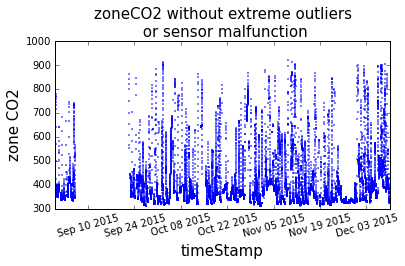

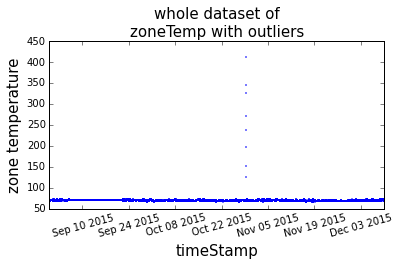

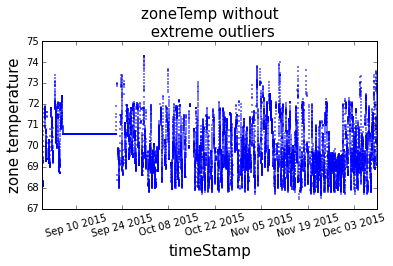

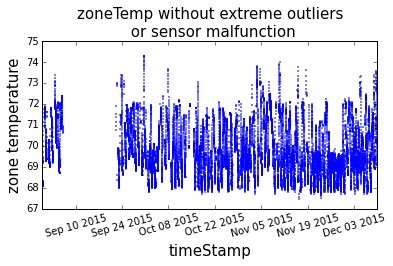

In [30]:

from matplotlib import interactive
interactive(False)

#plt.figure(figsize=(16,5))
#plt.subplot(1, 3, 1)
plt.figure(figsize=(6,3))
plt.plot(timeStamp,airFlow,'.',markersize = 2)
plt.title('whole dataset of airflow with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('air flow',size = 15)

#plt.subplot(1, 3, 2)
plt.figure(figsize=(6,3))
plt.plot(new_timeStamp,new_airFlow,'.',markersize = 2)
plt.title('airflow without extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('air flow',size = 15)

#plt.subplot(1, 3, 3)
plt.figure(figsize=(6,3))
plt.plot(final_timeStamp,final_airFlow,'.',markersize = 2)
plt.title('airflow without extreme outliers \n or sensor malfunction',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('air flow',size = 15)

# dampPos
#plt.figure(figsize=(16,5))
#plt.subplot(1, 3, 1)
plt.figure(figsize=(6,3))
plt.plot(timeStamp,dampPos,'.',markersize = 2)
plt.title('whole dataset of dampPos with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('damp position',size = 15)

#plt.subplot(1, 3, 2)
plt.figure(figsize=(6,3))
plt.plot(new_timeStamp,new_dampPos,'.',markersize = 2)
plt.title('dampPos without extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('damp position',size = 15)

#plt.subplot(1, 3, 3)
plt.figure(figsize=(6,3))
plt.plot(final_timeStamp,final_dampPos,'.',markersize = 2)
plt.title('dampPos without extreme outliers \n or sensor malfunction',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('damp position',size = 15)


# dischargeTemp
#plt.figure(figsize=(16,5))
#plt.subplot(1, 3, 1)
plt.figure(figsize=(6,3))
plt.plot(timeStamp,dischargeTemp,'.',markersize = 2)
plt.title('whole dataset of dischargeTemp \n with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('discharge temperature',size = 15)

#plt.subplot(1, 3, 2)
plt.figure(figsize=(6,3))
plt.plot(new_timeStamp,new_dischargeTemp,'.',markersize = 2)
plt.title('dischargeTemp without \n extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('discharge temperature',size = 15)

#plt.subplot(1, 3, 3)
plt.figure(figsize=(6,3))
plt.plot(final_timeStamp,final_dischargeTemp,'.',markersize = 2)
plt.title('dischargeTemp without extreme outliers \n or sensor malfunction',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('discharge temperature',size = 15)


# zoneCO2
#plt.figure(figsize=(16,5))
#plt.subplot(1, 3, 1)
plt.figure(figsize=(6,3))
plt.plot(timeStamp,zoneCO2,'.',markersize = 2)
plt.title('whole dataset of zoneCO2 with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('zone CO2',size = 15)

#plt.subplot(1, 3, 2)
plt.figure(figsize=(6,3))
plt.plot(new_timeStamp,new_zoneCO2,'.',markersize = 2)
plt.title('zoneCO2 without extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('zone CO2',size = 15)

#plt.subplot(1, 3, 3)
plt.figure(figsize=(6,3))
plt.plot(final_timeStamp,final_zoneCO2,'.',markersize = 2)
plt.title('zoneCO2 without extreme outliers \n or sensor malfunction',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('zone CO2',size = 15)


# zoneTemp
plt.figure(figsize=(6,3))
#plt.subplot(3, 1, 1)
plt.plot(timeStamp,zoneTemp,'.',markersize = 2)
plt.title('whole dataset of \nzoneTemp with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('zone temperature',size = 15)
plt.figure(figsize=(6,3))
#plt.subplot(3, 1, 2)
plt.plot(new_timeStamp,new_zoneTemp,'.',markersize = 2)
plt.title('zoneTemp without\n extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('zone temperature',size = 15)
plt.figure(figsize=(6,3))
#plt.subplot(3, 1, 3)
plt.plot(final_timeStamp,final_zoneTemp,'.',markersize = 2)
plt.title('zoneTemp without extreme outliers \n or sensor malfunction',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('zone temperature',size = 15)

In [31]:
print(len(timeStamp))
print(len(new_timeStamp))
print(len(final_timeStamp))

29089
22120
17384


The unreasonable data due to sensor malfunction has been eliminated. Just since the plot x-axis is time which must be continuous so it is still be seen in graph for that period.

In [32]:
print(type(final_timeStamp))

final_timeStamp = np.array(final_timeStamp)
final_airFlow = np.array(final_airFlow)
final_dampPos = np.array(final_dampPos)
final_dischargeTemp = np.array(final_dischargeTemp)
final_zoneCO2 = np.array(final_zoneCO2)
final_zoneTemp = np.array(final_zoneTemp)
final_occupancy = np.array(final_occupancy)

preprocessedData = np.column_stack((final_timeStamp,final_airFlow,final_dampPos,final_dischargeTemp,final_zoneCO2,final_zoneTemp,final_occupancy))
print(type(preprocessedData))
preprocessedData = preprocessedData.tolist()



def writeCSV(preprocessedData):
        c = csv.writer(open("preprocessedData.csv", "wb"))
        for row in preprocessedData:
            if any(row):
                print(row)
                c.writerow(row)
writeCSV(preprocessedData) # without considering Holiday

<type 'list'>
<type 'numpy.ndarray'>
[datetime.datetime(2015, 8, 30, 23, 56), 560.162109375, 11.23907089, 57.52135468, 333.749115, 68.36264801, 0]
[datetime.datetime(2015, 8, 31, 0, 1), 560.1679077148438, 11.23907089, 57.40848923, 334.8786316, 68.34007263, 0]
[datetime.datetime(2015, 8, 31, 0, 6), 560.2184448242188, 11.23907089, 57.29562378, 336.0081482, 68.31749725, 0]
[datetime.datetime(2015, 8, 31, 0, 11), 560.26904296875, 11.23907089, 57.18275452, 336.9736938, 68.30000305, 0]
[datetime.datetime(2015, 8, 31, 0, 16), 560.3196411132812, 11.23907089, 57.11151505, 336.7578735, 68.30000305, 0]
[datetime.datetime(2015, 8, 31, 0, 21), 559.616455078125, 11.23907089, 57.15467834, 336.5420532, 68.30000305, 0]
[datetime.datetime(2015, 8, 31, 0, 26), 558.0663452148438, 11.23907089, 57.19784546, 336.3262024, 68.30000305, 0]
[datetime.datetime(2015, 8, 31, 0, 31), 556.5162963867188, 11.23907089, 57.24101257, 336.1103821, 68.30000305, 0]
[datetime.datetime(2015, 8, 31, 0, 36), 554.9662475585938, 1

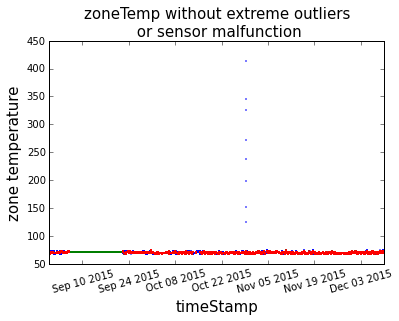

In [49]:
from matplotlib import interactive
interactive(True)
#plt.figure(figsize=(16,5))
#plt.subplot(1, 3, 1)
plt.plot(timeStamp,zoneTemp,'.',markersize = 2)
plt.title('whole dataset of zoneTemp with outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('zone temperature',size = 15)

#plt.subplot(1, 3, 2)
plt.plot(new_timeStamp,new_zoneTemp,'.',markersize = 2)
plt.title('zoneTemp without extreme outliers',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('zone temperature',size = 15)

#plt.subplot(1, 3, 3)
plt.plot(final_timeStamp,final_zoneTemp,'.',markersize = 2)
plt.title('zoneTemp without extreme outliers \n or sensor malfunction',size = 15)
plt.xlabel('timeStamp',size = 15)
plt.xticks(rotation=15)
plt.ylabel('zone temperature',size = 15)